## Introduction
This notebook contains the instructions to run the sra_public docker to query, download and store the RNA Seq public datasets from GEO using the GSE number. 

The docker can be run in three ways:<font color=blue>
1. build and run docker image on a local server 
2. copy files in the folder to an AWS EC2 instance, build and run the docker image on EC2
3. build docker image on a local server, tag and push the docker image to AWS ECR, and run ECR image using AWS ECS     </font>

   
This notebook will introduce these three ways    

## 1. build and run docker image on a local server
1. download the folder from git to the local machine, configure the system with AWS credential informations exported as environment variables.
2. enter to the folder, and run the command:   
 ```docker build -t sra_public .```
in this command, <font color=blue>sra_public</font> is the name of the docker image 
3. make sure the docker image is successfully built, then run the command:    
 ```docker run --name sra_public -d sra_public GSEXXXXXX s3://yourbucket/```

## 2. build and run docker image on an AWS EC2 instance
1. download the folder from git to the local machine, decompress the folder, modify .aws/credentials and .aws/config files using your aws credentials and configuration, and save the folder as sra_public
2. Start an AWS EC2 instance 
3. copy the sra_public foler to EC2 instance by:    
```scp -i "EC2_test.pem" -r sra_public ec2-user@ec2-18-216-125-17.us-east-2.compute.amazonaws.com:~```  
4. connect to the EC2 instance using ssh and EC2's Public DNS:   
```ssh -i "EC2_test.pem" ec2-user@ec2-18-216-125-17.us-east-2.compute.amazonaws.com```
5. run the following commands to install docker and set up the permission for ec2-user to access docker:   
```
    sudo yum update -y   
    sudo yum install -y docker     
    sudo service docker start     
    sudo usermod -a -G docker ec2-user   
    exit
```
6. note that you have to exit from the EC2 for the settings to be effective,now connect to EC2 again,and try the following command:   
```docker info``` 

It will return docker related information without error message.
7. once you connect to the EC2 instance, you should see the folder sra_publid, enter the folder, and run   
```docker build -t sra_public .``` In this command, <font color=blue>sra_public</font> is the name of the docker image 
8. make sure the docker image is successfully built, then run the command:    
```docker run --name sra_public -d sra_public GSEXXXXXX s3://yourbucket/```     

Note: If you EC2 has limited capacity, you can run the following command:   
```docker run --name sra_public -d sra_public sra_ecr.sh GSEXXXXXX s3://yourbucket/```
This version will consume much smaller disk space but will be slower. In addition, it will not generate the mapping from file from GSE to SRR.

## 3. AWS ECR and ECS
1. download the folder from git to the local machine, decompress the folder, modify .aws/credentials and .aws/config files using your aws credentials and configuration, and save the folder as sra_public
2. enter to the folder, and run the command:   
``` docker build -t sra_public .``` In this command, <font color=blue>sra_public</font> is the name of the docker image
3. log into aws ecr:    
```aws ecr get-login --region us-east-2 --no-include-email```
4. <font color=blue>copy and paste the output from this command</font>
5. create ecr repository:    
```aws ecr create-repository --repository-name sra_rna_tool</font>```
6. make sure the docker image is successfully built, then tag the images    
```docker tag sra_public [aws_ecr_uri],eg. 098240359427.dkr.ecr.us-east-1.amazonaws.com/sra_rna_tools```
7. push the tagged docker image to AWS ECR using the following command line:       
  ```docker push [aws_ecr_rui],eg. 098240359427.dkr.ecr.us-east-1.amazonaws.com/sra_rna_tools```
8. in AWS ECS console, define the image [aws_ecr_rui], and then in CMD input text field, type ```GSEXXXXXX,s3://bucketname/``` in environment section.  
7. run the ECS and in the log section, you should see the execution of docker container.

Note: If you ECS has limited capacity, you can type
```sra_ecr.sh GSEXXXXXX,s3://bucketname/``` in the input text field of the environment section.
. This version will consume much smaller disk space but will be slower. In addition, it will not generate the mapping from file from GSE to SRR.
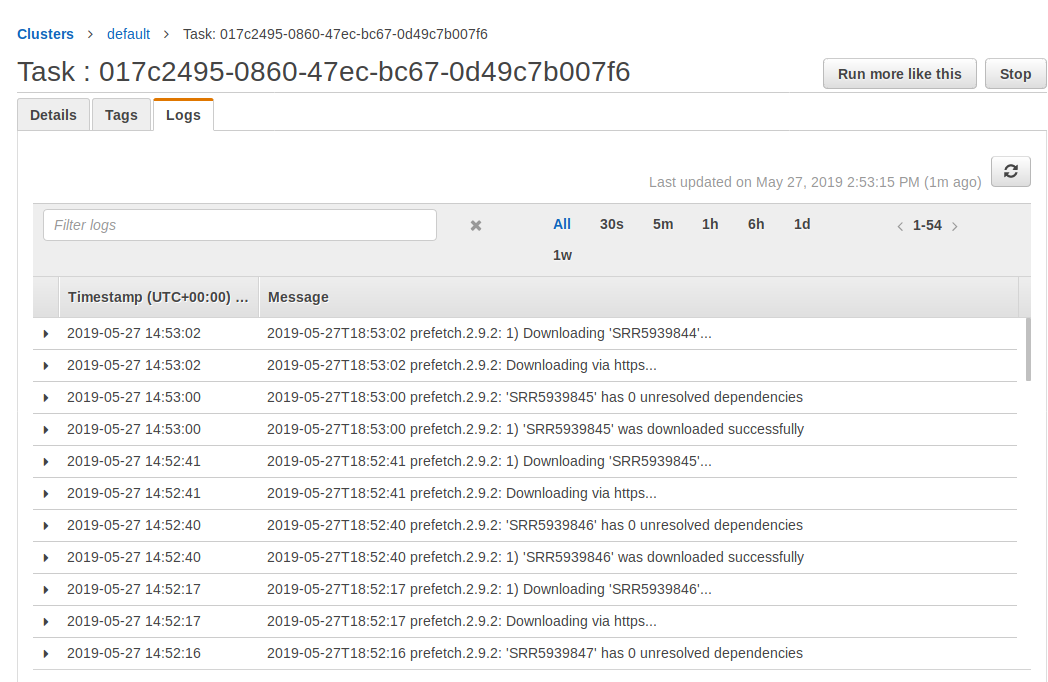

## 4. Download Missing Files
Since there are large numbers and volumes of RNA-Seq files to be download, it is inevitable that some files will be missed during the download process. Once the missing files are identified, you can run the following command:   

```
docker run --name sra_download -d -v $(pwd):/root/ncbi/public/sra <docker_img_name > srr_missing_file.sh s3://your_bucket/your_folder SRRXXXXX SRRXXXXX. ```
You can also input an array containing all SRR numbers.
